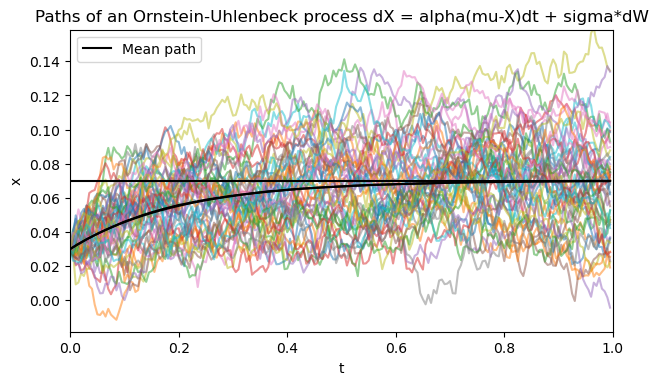

In [60]:
#!/usr/bin/python3
#Ornstein_Uhlenbeck_process.ipynb
#Parth Parakh
#purpose: Simulate an Ornstein-Uhlenbeck process
#dX = alpha*(mu-X)*dt + sigma*dW

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------------------------------

#Defining the parameters
npaths = 20000;           #number of paths
T = 1;                   #time horizon
nsteps = 200;            #number of time steps
dt = T/nsteps;           #time step
t = np.arange(0,T,dt);   #observation times
alpha = 5; mu = 0.07; sigma = 0.07; #model parameters
X0 = 0.03;

X = np.zeros(npaths*nsteps);
X.resize(nsteps,npaths);
X[0,:] = 0.03;
N = np.random.normal(0,1,(nsteps,npaths));
SDev = sigma*np.sqrt(dt);

for i in range(0,nsteps-1):
    X[i+1,:] = X[i,:] + alpha*(mu-X[i,:])*dt + SDev*N[i,:];
    
EX = mu+(X0-mu)*np.exp(-alpha*t);

plot1 = plt.figure(1,figsize=(7,4), dpi=100)
for i in range(0,50):
    plt.plot(t,X[:,i],alpha=0.5)
plt.plot(t,EX,'black', label = 'Mean path')
plt.plot(t,np.mean(X,axis=1),'black');
plt.plot(t,mu*np.ones(len(t)),'black')
sdevinfty = sigma/np.sqrt(2*alpha);
plt.ylim(mu-4*sdevinfty,mu+4*sdevinfty)
plt.xlim(0,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Paths of an Ornstein-Uhlenbeck process dX = alpha(mu-X)dt + sigma*dW')
plt.show()